# Social Network Analysis on Twitter Data

In [2]:
library(rtweet)


In [5]:
library(twitteR) 
library("ggmap")
library("maptools")
library(maps)
library("RSQLite")
library(ggplot2)


Attaching package: ‘twitteR’

The following object is masked from ‘package:rtweet’:

    lookup_statuses

Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


In [4]:
appname <- "anish-dic"
key <- "r7H94a9R5e3e9bwRCQDYn0yuD"
secret <- "9yURXNKVv91A4OqbT6CmtA7smmMJje4NdrzDDXS9e0MaMcHfIM"

## created token named "twitter_token"
twitter_token <- create_token(
  app = appname,
  consumer_key = key,
  consumer_secret = secret)

Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://api.twitter.com/oauth/authenticate?oauth_token=eZLOuAAAAAAA4V8sAAABYghafUM&permission=read
Authentication complete.


In [7]:
home_directory <- path.expand("~/")

## combine with name for token
file_name <- file.path(home_directory, "twitter_token.rds")

## save token to home directory
saveRDS(twitter_token, file = file_name)

In [9]:
cat(paste0("TWITTER_PAT=", file_name),
    file = file.path(home_directory, ".Renviron"),
    append = TRUE)

In [9]:
rt <- search_tweets(
  "flu", geocode = lookup_coords("usa"), n = 20000
)

Searching for tweets...
This may take a few seconds...
Finished collecting tweets!


In [14]:
save_as_csv(rt, "rtweet.csv")

In [63]:
rt <- read.csv(file="rtweet.tweets.csv", header=TRUE, sep=",")
dim(rt)

[1] 17871    70

In [58]:
fs <- search_tweets(
  "flushot", geocode = lookup_coords("usa"), n = 20000
)

Searching for tweets...
This may take a few seconds...
Finished collecting tweets!


In [59]:
save_as_csv(fs, "fs.csv")

In [64]:
fs <- read.csv(file="fs.tweets.csv", header=TRUE, sep=",")
dim(fs)

[1] 590  68

In [60]:
infl <- search_tweets(
  "influenza", geocode = lookup_coords("usa"), n = 20000)
save_as_csv(rt, "infl.csv")

Searching for tweets...
This may take a few seconds...
Finished collecting tweets!
Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c("xx971925919437869057", :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c("xx541372981", "xx63303159", :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c("x", "x", "x", "x", :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c("x", "xx98970267", :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c("xx732611818951151616", :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c("x", "x", "x", "x", :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c("x", "x", "x", "x", :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, !is.na(x), value = c

In [90]:
library(gtools)

In [92]:
final <- smartbind(rt, fs,infl)

Warning message in smartbind(rt, fs, infl):
“Column class mismatch for 'status_id'. Converting column to class 'character'.”Warning message in if (allSubset) {:
“the condition has length > 1 and only the first element will be used”Warning message in smartbind(rt, fs, infl):
“Column class mismatch for 'user_id'. Converting column to class 'character'.”Warning message in if (allSubset) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (allSubset) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (allSubset) {:
“the condition has length > 1 and only the first element will be used”Warning message in smartbind(rt, fs, infl):
“Column class mismatch for 'reply_to_status_id'. Converting column to class 'character'.”Warning message in smartbind(rt, fs, infl):
“Column class mismatch for 'reply_to_user_id'. Converting column to class 'character'.”Warning message in if (allSubset) {:
“the condition has length

In [93]:
dim(final)

[1] 36332    70

In [65]:
require(magrittr)
require(readr)

In [112]:

# rtweet_tweets, the CSV you're reading ;D

newretweets <- final %>% select(place_full_name) %>% na.omit()

i <- 0
savedStates <- c()
for (x in newretweets) {
  blah <- x %>% str_split(", ")
  for (element in blah) {
    if (!is.na(element[2])) {
      #print(element[2])
      if (element[2] == "USA") {
        if(element[1] %in% state.name) {
          savedStates <- c(savedStates, element[1])
          print(element[1])
        }
        i <- i+1
      } else if (element[2] %in% state.abb) {
        print(state.name[match(element[2],state.abb)])
        savedStates <- c(savedStates, state.name[match(element[2],state.abb)])
        i <- i+1
      }
    }
  }
}
print(i)
# States not in tweets
statesNoTweets <- state.name[!(state.name %in% unique(savedStates))]

savedStatesDF <- savedStates %>% table %>% as.data.frame()

emptyStatesDF <- data.frame(`States` = statesNoTweets, Freq = rep(0,length(statesNoTweets)))

allStatesDF <- rbind(savedStatesDF, emptyStatesDF)

[1] "Ohio"
[1] "Pennsylvania"
[1] "North Dakota"
[1] "Ohio"
[1] "California"
[1] "Michigan"
[1] "Washington"
[1] "North Carolina"
[1] "California"
[1] "Alabama"
[1] "South Carolina"
[1] "Tennessee"
[1] "Indiana"
[1] "Texas"
[1] "Virginia"
[1] "California"
[1] "Arizona"
[1] "California"
[1] "Ohio"
[1] "Texas"
[1] "Ohio"
[1] "Ohio"
[1] "Texas"
[1] "Florida"
[1] "Massachusetts"
[1] "Arkansas"
[1] "New Jersey"
[1] "Florida"
[1] "Colorado"
[1] "Indiana"
[1] "Virginia"
[1] "North Carolina"
[1] "Maryland"
[1] "Ohio"
[1] "North Carolina"
[1] "Pennsylvania"
[1] "Massachusetts"
[1] "Georgia"
[1] "California"
[1] "Texas"
[1] "Texas"
[1] "Kentucky"
[1] "Pennsylvania"
[1] "Ohio"
[1] "Indiana"
[1] "Ohio"
[1] "Washington"
[1] "Kentucky"
[1] "Florida"
[1] "California"
[1] "New York"
[1] "Illinois"
[1] "Ohio"
[1] "Massachusetts"
[1] "Ohio"
[1] "Ohio"
[1] "Ohio"
[1] "Ohio"
[1] "Ohio"
[1] "Illinois"
[1] "California"
[1] "New York"
[1] "Illinois"
[1] "North Carolina"
[1] "New Jersey"
[1] "Texas"
[1] "Cali

ERROR: Error in match.names(clabs, names(xi)): names do not match previous names


In [113]:
head(allStatesDF)

.,Freq
Alabama,24
Arizona,40
Arkansas,8
California,274
Colorado,19
Connecticut,8


In [114]:
as.numeric(as.character(allStatesDF$Freq))

[1]  24  40   8 274  19   8   6  94  36   2  54  36  12  14  24  12   6  26  36
[20]  36  14  20  22   2   6  14   8  30   6  73  34   4 148  16  24  86   2  24
[39]  33 175  10  36  28  15   0   0   0   0   0   0

NULL

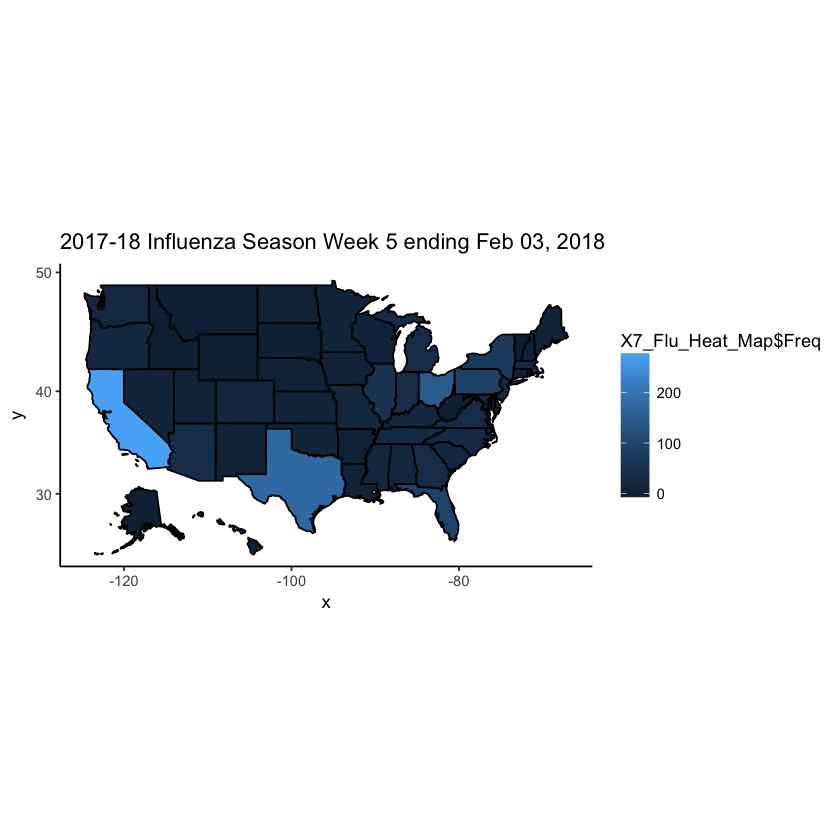

In [141]:
library(tidyverse)
library(reshape2)
library(magrittr)
library(fiftystater)

library(mapproj)

X7_Flu_Heat_Map <- allStatesDF
#X7_Flu_Heat_Map <- allStatesDF %>% select(., Freq)

#X7_Flu_Heat_Map$Freq <- newSeries %>% factor(levels = c("10", "9", "8", "7", "6", "5", "4", "3", "2", "1"))

X7_Flu_Heat_Map$. <- X7_Flu_Heat_Map$. %>% tolower()


ggplot(X7_Flu_Heat_Map, aes(fill=X7_Flu_Heat_Map$Freq, map_id=X7_Flu_Heat_Map$`.`)) +
  geom_map(map=fifty_states, color = 'black') +
  expand_limits(x=fifty_states$long, y=fifty_states$lat) +
  coord_map() +
  theme_classic() +
  ggtitle("2017-18 Influenza Season Week 5 ending Feb 03, 2018") 
  scale_fill_manual(drop=FALSE, name = "ILI Activity Level", values = c("#cc0000", "#fa4f00", "#fc8200", "#fcb100", "#f7df00", "#e0f500", "#baf700", "#8cf700", "#5bf700", "#00c200")) +
  theme(#axis.title.x=element_blank(),
        #axis.text.x=element_blank(), axis.ticks.x=element_blank(),
        #axis.title.y = element_blank(),
        #axis.text.y = element_blank(),
        #axis.ticks.y = element_blank(),
        #line = element_blank(),
    #plot.title = element_text(hjust = 0.5, face = 'bold', size = 15),
        legend.text = element_blank(),
        legend.title = element_text(face = 'bold', size = 12))